Notebook to collect the information of the generation

### Import

In [1]:
import sys, os, re, yaml, pickle
import commands
from glob import glob
from prettytable import PrettyTable
sys.path.append('../lib')

import time, datetime

In [2]:
import signal

class TimeoutError(Exception):
    pass

class timeout:
    def __init__(self, seconds=1, error_message='Timeout'):
        self.seconds = seconds
        self.error_message = error_message
    def handle_timeout(self, signum, frame):
        raise TimeoutError(self.error_message)
    def __enter__(self):
        signal.signal(signal.SIGALRM, self.handle_timeout)
        signal.alarm(self.seconds)
    def __exit__(self, type, value, traceback):
        signal.alarm(0)

# with timeout(seconds=1):
#     try:
#         time.sleep(2)
#     except TimeoutError:
#         print 'Got it'

In [3]:
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from progressBar import ProgressBar

In [4]:
import uproot as ur
import ROOT as rt
rt.gErrorIgnoreLevel = rt.kError
rt.RooMsgService.instance().setGlobalKillBelow(rt.RooFit.ERROR)

Welcome to JupyROOT 6.12/07


In [5]:
# load FWLite C++ libraries
rt.gSystem.Load("libFWCoreFWLite.so");
rt.gSystem.Load("libDataFormatsFWLite.so");
rt.FWLiteEnabler.enable()

# load FWlite python libraries
from DataFormats.FWLite import Lumis
from DataFormats.FWLite import Handle
# import commands

In [6]:
from analysis_utilities import DSetLoader

# Inputs

Max 3 dataset per time otherwise run out of memory

In [7]:
order = ['mu_c0', 'tau_c0',
         'DstPip_c0', 'DstPi0_c0', 'DststPipPi0_c0', 'DststPipPim_c0', 'DststPi0Pi0_c0', 
         'Bp_TauNuDstst_Pip_PUc0', 'B0_TauNuDstst_Pi0_PUc0',
         'DstmDsp','DstmD0','DstmDp','BpHc','BmHc','antiB0Hc',
        ]

In [8]:
inDic = {}

In [9]:
# inDic['muHQET_0'] = DSetLoader('B0_MuNuDmst_HQETcentral_PU0')
# inDic['mu_0'] = DSetLoader('B0_MuNuDmst_PU0')
# inDic['mu_20'] = DSetLoader('B0_MuNuDmst_PU20')
# inDic['mu_c0'] = DSetLoader('B0_MuNuDmst_PUc0')
inDic['muSoft_c0'] = DSetLoader('B0_MuNuDmst_SoftQCDall_PUc0')
# inDic['mu_35'] = DSetLoader('B0_MuNuDmst_PU35')

# inDic['tau_0'] = DSetLoader('B0_TauNuDmst_PU0')
# inDic['tau_20'] = DSetLoader('B0_TauNuDmst_PU20')
# inDic['tau_c0'] = DSetLoader('B0_TauNuDmst_PUc0')
# inDic['tau_35'] = DSetLoader('B0_TauNuDmst_PU35')

# inDic['Hc_20'] = DSetLoader('B0_DmstHc_PU20')
# inDic['Hc_c0'] = DSetLoader('B0_DmstHc_PUc0')


# inDic['DstmDsp'] = DSetLoader('B0_DstmDsp_PUc0')

# inDic['DstmDp'] = DSetLoader('B0_DstmDp_PUc0')

# inDic['DstmD0'] = DSetLoader('B0_DstmD0_PUc0')

# inDic['BpHc'] = DSetLoader('Bp_DstmHc_PUc0')

# inDic['BmHc'] = DSetLoader('Bm_DstmHc_PUc0')

# inDic['antiB0Hc'] = DSetLoader('antiB0_DstmHc_PUc0')


# inDic['DstPip_20'] = DSetLoader('Bp_MuNuDstst_PU20')
# inDic['DstPip_c0'] = DSetLoader('Bp_MuNuDstst_Pip_PUc0')

# inDic['DstPi0_c0'] = DSetLoader('B0_MuNuDstst_Pi0_PUc0')

# inDic['DstPi0_nR_c0'] = DSetLoader('B0_DmstPi0MuNu_PUc0')

# inDic['DststPipPi0_c0'] = DSetLoader('Bp_MuNuDstst_PipPi0_PUc0')
# inDic['DststPipPi0_nR_c0'] = DSetLoader('Bp_MuNuDstPipPi0_PUc0')

# inDic['DststPipPim_c0'] = DSetLoader('B0_MuNuDstst_PipPim_PUc0')
# inDic['DststPipPim_nR_c0'] = DSetLoader('B0_MuNuDstPipPim_PUc0')

# inDic['DststPi0Pi0_c0'] = DSetLoader('B0_MuNuDstst_Pi0Pi0_PUc0')

# inDic['B0_DststPiPiPi_c0'] = DSetLoader('B0_MuNuDstPiPiPi_PUc0')

# inDic['Bp_DststPiPiPi_c0'] = DSetLoader('Bp_MuNuDstPiPiPi_PUc0')

# inDic['B0_TauNuDstst_Pi0_PUc0'] = DSetLoader('B0_TauNuDstst_Pi0_PUc0')

# inDic['Bp_TauNuDstst_Pip_PUc0'] = DSetLoader('Bp_TauNuDstst_Pip_PUc0')

CAND efficiency file missing.


In [10]:
# inDic['mu_0'] = DSetLoader('B0_MuNuDmst_PU0', candDir='ntuples_probeB2DstMu')
# inDic['p_mu_c0'] = DSetLoader('p_B0_MuNuDst_PUc0', candDir='ntuples_probeB2DstMu')
# inDic['p_tau_c0'] = DSetLoader('p_B0_TauNuDst_PUc0', candDir='ntuples_probeB2DstMu')

In [11]:
# inDic['JPsiKst_0'] = DSetLoader('B0_JpsiKst_PU0', candDir='ntuples_B2JpsiKst')
# inDic['JPsiKst_20'] = DSetLoader('B0_JpsiKst_PU20', candDir='ntuples_B2JpsiKst')
# inDic['JPsiKst_35'] = DSetLoader('B0_JpsiKst_PU35', candDir='ntuples_B2JpsiKst')

# inDic['JPsiKstFSR_20'] = DSetLoader('B0_JpsiKstFSR_PU20', candDir='ntuples_B2JpsiKst')
# inDic['JPsiKst_c0'] = DSetLoader('B0_JpsiKst_PUc0', candDir='ntuples_B2JpsiKst')

# inDic['JPsiKst_c0'] = DSetLoader('Bp_JpsiK_PUc0', candDir='ntuples_B2JpsiK')

# Efficiency

In [12]:
def getEff(k,N):
    e = k/float(N)
    de = np.sqrt(e*(1-e)/N)
    return [e, de]

## Generator Efficiency

In [13]:
handle = {}
handle['genFilter'] = [Handle('GenFilterInfo'), ('genFilterEfficiencyProducer', '', 'SIM')]
handle['genProduct'] = [Handle('GenLumiInfoProduct'), ('generator', '', 'SIM')]

In [14]:
def analyzeMINIAODs(fileList):  
    print 'Analizing', len(fileList), 'MINIAOD'
    N_gen = 0
    N_cuts = 0
    xsec = []
    xsec_err = []
    pb = ProgressBar(maxEntry=len(fileList))
    skippedFiles = []
    for i_j, fileName in enumerate(fileList):
        pb.show(i_j)
        with timeout(seconds=1):
            try:
#                 cmd = 'python generatorEfficiency_MINIAODSIM.py ' + fileName
#                 status, output = commands.getstatusoutput(cmd)
#                 aux = output.split(' ')
#                 N_gen += float(aux[0])
#                 N_cuts += float(aux[1])
#                 xsec.append(float(aux[2]))
#                 xsec_err.append(float(aux[4]))
                for lumi in Lumis(fileName):
                    prods = {}
                    for k,v in handle.iteritems():
                        lumi.getByLabel(v[1], v[0])
                        prods[k] = v[0].product()
                    N_cuts += prods['genFilter'].numEventsPassed()
                    N_gen += prods['genFilter'].numEventsTotal()
                    xs = prods['genProduct'].getProcessInfos()[0].lheXSec()
                    xsec.append(xs.value())
                    xsec_err.append(xs.error())
            except TimeoutError:
                skippedFiles.append(fileName)
    print 'Skipped {} files'.format(len(skippedFiles))
    print 'Total events in analyzed MINIAODs', N_cuts
    xsec = np.array(xsec)
    xsec_err = np.array(xsec_err)
    return N_gen, N_cuts, xsec, xsec_err

In [15]:
N_max = 500
recreate = []#inDic.keys()
for n, d in inDic.iteritems():
    print '\n\n--> ' + d.sample
    
    outdir = os.path.join(d.candLoc, d.full_name)
    outyamlFile = os.path.join(outdir,'effMCgenerator.yaml')
    if os.path.isfile(outyamlFile) and not n in recreate:
        print 'Already present'
        dic = yaml.load(open(outyamlFile, 'r'))
        print dic
        continue
        
    fileList = []
    for directory in d.MINIAOD_dirs:
        fileList += glob(directory + '/out_MINIAODSIM_*.root')
    if N_max > 0 and N_max < len(fileList):
        fileList = np.random.choice(fileList, N_max)
    
    N_gen, N_cuts, xsec, xsec_err = analyzeMINIAODs(fileList)
    s2 = np.square(xsec_err)
    num = np.sum(xsec/s2)
    den = np.sum(1./s2)
    xsec = 1e3*num/den
    xsec_err = 1e3*np.sqrt(1/den)
    print 'Xsec: {:1.4e} +/- {:1.4e} fb ({:1.1e})'.format(xsec, xsec_err, xsec_err/xsec)
    d.xsec = [xsec, xsec_err]
    
    e, de = getEff(N_cuts, N_gen)
    print 'eff generator: {:1.3e} +/- {:1.3e} ({:1.1e})'.format(e,de, de/e)
    d.effGEN = [e, de]

    dump_dic = {}
    for k in ['xsec', 'effGEN']:
        aux = getattr(d, k)
        dump_dic[k] = [float(aux[0]), float(aux[1])]
    if not os.path.isdir(outdir):
        os.makedirs(outdir)
    with open(outyamlFile, 'w') as dumpF:
        dumpF.write(yaml.dump(dump_dic, default_flow_style=False, default_style=''))



--> B0_MuNuDmst_SoftQCDall_PUc0
Already present
{'xsec': [100304153742740.62, 20292.627358270955], 'effGEN': [3.9511088709677416e-05, 4.462519064720864e-07]}


## ntuplizer efficiency

In [16]:
for d in inDic.values():
    print '\n\n--> ' + d.sample

    if not os.path.isdir(d.ntuples_dir):
        continue
    cand_out_list = glob(os.path.join(d.ntuples_dir,'out/job*.out'))
    N_analyzed = 0
    N_trg = 0
    N_cand = 0
    print 'Analyzing {} ntuplizer job logs'.format(len(cand_out_list))
    pb = ProgressBar(maxEntry=len(cand_out_list))
    for ic, cand_out in enumerate(cand_out_list):
        pb.show(ic)
        eff_ln = []
        counters = []
        takingCounters = False
        for line in open(cand_out).readlines():
            if 'efficiency:' in line:
                eff_ln.append(line)
            elif 'counters:' in line:
                    takingCounters = True
            elif takingCounters and line[:-1].isdigit():
                counters.append(int(line[:-1]))
            elif takingCounters:
                takingCounters = False

        aux = re.search('[0-9]+/[0-9]+', eff_ln[0]).group(0)
        aux = aux.split('/')
        N_analyzed += int(aux[1])
        N_trg += int(aux[0])
        
        aux = re.search(': [0-9]+/', eff_ln[1]).group(0)
        N_cand += int(aux[2:-1])
        
        counters=np.array(counters)
        if not hasattr(d, 'counters'):
            d.counters = counters
        else:
            d.counters += counters
        
    d.nTotMINIAOD = N_analyzed
    d.nTotCAND = N_cand
    print 'Total MINIAOD:', N_analyzed
    print 'Total candidates:', N_cand
    
    e, de = getEff(N_trg, N_analyzed)
    d.effCAND_trg = e, de
    print 'eff candidates (trigger): {:1.3e} +/- {:1.3e} ({:1.1e})'.format(e,de, de/e)
    latexStr = '${:.2f} \pm {:.2f}$'.format(100*e, 100*de)
    
    e, de = getEff(N_cand, N_trg)
    d.effCAND_cand = e, de
    print 'eff candidates (cand): {:1.3e} +/- {:1.3e} ({:1.1e})'.format(e,de, de/e)
    latexStr += ' & ${:.2f} \pm {:.2f}$'.format(100*e, 100*de)
    
    
    e, de = getEff(N_cand, N_analyzed)
    d.effCAND = e, de
    print 'eff candidates: {:1.3e} +/- {:1.3e} ({:1.1e})'.format(e,de, de/e)
    latexStr += ' & ${:.2f} \pm {:.2f}$\\'.format(100*e, 100*de)
    print latexStr
    
    print 'Getting the total rates (if existing)'
    try:
        fCandLoc = glob(os.path.join(d.ntuples_dir,'out_CAND_*.root'))[0]
        fCand = ur.open(fCandLoc)
        Trate = fCand['p']['Trate']
        d.rate = {}
        for k in Trate.keys():
            r = Trate.array(k)[0]
            r *= 1e12 #GeV -> meV
            d.rate[str(k)] = r
        print 'Done'
    except:
        print 'Not found'
    
    dump_dic = {'nTotMINIAOD': int(d.nTotMINIAOD), 'nTotCAND': int(d.nTotCAND)}
    for k in ['effCAND', 'effCAND_trg', 'effCAND_cand']:
        aux = getattr(d, k)
        dump_dic[k] = [float(aux[0]), float(aux[1])]
    if hasattr(d, 'rate'):
        for k, v in d.rate.iteritems():
            dump_dic['rate_'+k] = float(v)
    with open(os.path.join(d.ntuples_dir,'effCAND.yaml'), 'w') as dumpF:
        dumpF.write(yaml.dump(dump_dic, default_flow_style=False, default_style=''))



--> B0_MuNuDmst_SoftQCDall_PUc0
Analyzing 300 ntuplizer job logs
[####################]  100% - Tot. time: 4.0 s
Total MINIAOD: 2712869
Total candidates: 113941
eff candidates (trigger): 3.794e-01 +/- 2.946e-04 (7.8e-04)
eff candidates (cand): 1.107e-01 +/- 3.093e-04 (2.8e-03)
eff candidates: 4.200e-02 +/- 1.218e-04 (2.9e-03)
$37.94 \pm 0.03$ & $11.07 \pm 0.03$ & $4.20 \pm 0.01$\
Getting the total rates (if existing)
Done


+-----------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+
|   Sample  |   0   |   1   |   2   |   3   |   4   |   5   |   6   |   7   |   8   |  9   |  10  |  11  |  12  |
+-----------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+
| muSoft_c0 | 37.94 | 37.39 | 37.05 | 35.59 | 34.21 | 29.06 | 20.63 | 20.56 | 18.28 | 9.97 | 4.35 | 4.20 | 4.20 |
+-----------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+


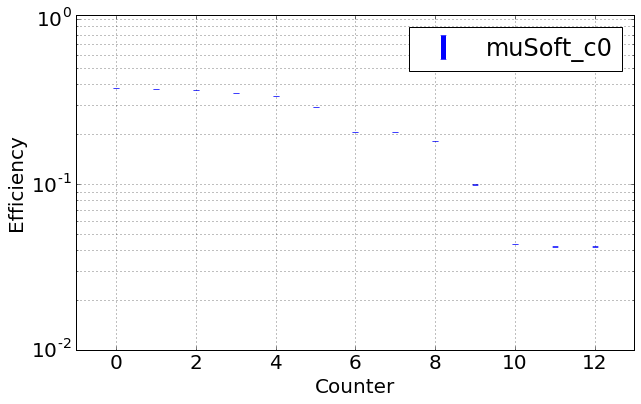

In [17]:
t = PrettyTable()
t.field_names = ['Sample'] + [str(i) for i in range(d.counters.shape[0])]
for n, d in inDic.iteritems():
    eff = np.zeros((d.counters.shape[0], 2))
    eff[0] = d.effCAND_trg
    for i in range(d.counters[1:].shape[0]):
        eff[i+1] = getEff(d.counters[i+1], d.nTotMINIAOD)
    t.add_row([n] + ['{:.2f}'.format(100*e[0]) for e in eff])
    x = np.arange(eff.shape[0])
    p = plt.errorbar(x, eff[:, 0], eff[:,1], lw=0, elinewidth=5, label=n)
    
#     plt.plot(x[[0,-1]], 2*[d.effCAND[0]], '-', color=p[0].get_color())
#     plt.fill_between(x[[0,-1]], 2*[d.effCAND[0]-d.effCAND[1]], 2*[d.effCAND[0]+d.effCAND[1]], color=p[0].get_color(), alpha=0.2)
print t
plt.rcParams.update({'font.size': 20})
plt.xlabel('Counter')
plt.ylabel('Efficiency')
plt.legend(loc='best', numpoints=1)
plt.ylim(0.01,1.05)
plt.xlim(-1, eff.shape[0])
plt.grid(True, which='both')
plt.yscale('log')
plt.gcf().set_size_inches(10, 6)

+-----------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+
|   Sample  |   0   |   1   |   2   |   3   |   4   |   5   |   6   |   7   |   8   |   9   |   10  |   11  |   12   |
+-----------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+
| muSoft_c0 | 37.94 | 98.53 | 99.10 | 96.05 | 96.12 | 84.97 | 70.99 | 99.67 | 88.92 | 54.50 | 43.66 | 96.52 | 100.00 |
+-----------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+


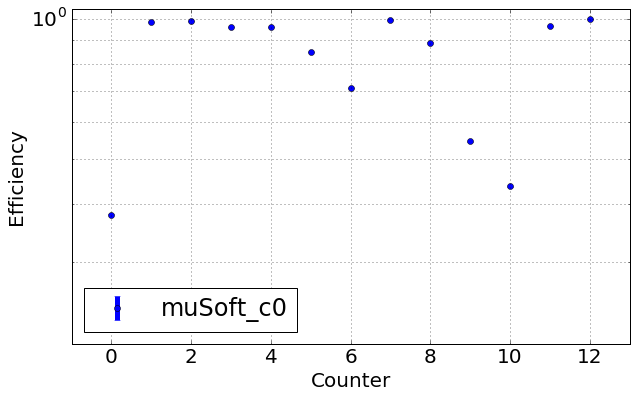

In [18]:
t = PrettyTable()
t.field_names = ['Sample'] + [str(i) for i in range(d.counters.shape[0])]
for n, d in inDic.iteritems():
    eff = np.zeros((d.counters.shape[0], 2))
    eff[0] = d.effCAND_trg
    for i in range(d.counters[1:].shape[0]):
        eff[i+1] = getEff(d.counters[i+1], d.counters[i])
    t.add_row([n] + ['{:.2f}'.format(100*e[0]) for e in eff])
    x = np.arange(eff.shape[0])
    p = plt.errorbar(x, eff[:, 0], eff[:,1], fmt='o', lw=0, elinewidth=5, label=n)
print t
plt.rcParams.update({'font.size': 20})
plt.xlabel('Counter')
plt.ylabel('Efficiency')
plt.legend(loc='best', numpoints=1)
plt.ylim(0.2,1.05)
plt.xlim(-1, eff.shape[0])
plt.grid(True, which='both')
plt.yscale('log')
plt.gcf().set_size_inches(10, 6)

## Skim Efficiency

In [19]:
for p in order:
    if not p in inDic.keys():
        continue
    
    s = []
    for c in ['Low', 'Mid', 'High']:
        s.append(inDic[p].printSkimEffLatex(c+'_bare'))
    s = ' & '.join(s)
    s += '\\\\'
#     print p, s
    print s